# Node- Node type and count EDA

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load the data
data_path1 = 'Node-NodeCount.csv'
data = pd.read_csv(data_path1)

In [3]:
data['node_pair'] = data['label_n'] + '-' + data['label_m']

In [4]:
# Display the first few rows of the dataframe to understand its structure
data.head()

,label_n,label_m,COUNT(r),node_pair
0,"""Disease""","""Disease""",32646,"""Disease""-""Disease"""
1,"""Experimental_factor""","""Disease""",2122,"""Experimental_factor""-""Disease"""
2,"""Modified_protein""","""Disease""",2121,"""Modified_protein""-""Disease"""
3,"""Protein""","""Disease""",7082494,"""Protein""-""Disease"""
4,"""Clinically_relevant_variant""","""Disease""",4555,"""Clinically_relevant_variant""-""Disease"""


In [5]:
data.columns = ['StartNode', 'EndNode','Count', 'NodePair']

In [6]:
data.head()

,StartNode,EndNode,Count,NodePair
0,"""Disease""","""Disease""",32646,"""Disease""-""Disease"""
1,"""Experimental_factor""","""Disease""",2122,"""Experimental_factor""-""Disease"""
2,"""Modified_protein""","""Disease""",2121,"""Modified_protein""-""Disease"""
3,"""Protein""","""Disease""",7082494,"""Protein""-""Disease"""
4,"""Clinically_relevant_variant""","""Disease""",4555,"""Clinically_relevant_variant""-""Disease"""


In [7]:
# Summarizing the total occurrences for each unique node pair
node_pair_summary = data.groupby('NodePair')['Count'].sum().sort_values(ascending=False).reset_index()

In [8]:
node_pair_summary.head()

,NodePair,Count
0,"""Publication""-""Tissue""",102869858
1,"""Tissue""-""Publication""",102869858
2,"""Disease""-""Publication""",55529028
3,"""Publication""-""Disease""",55529028
4,"""Publication""-""Cellular_component""",43839377


In [9]:
df = pd.DataFrame(data)

# Sort by 'Count' column
sorted_df = df.sort_values(by='Count', ascending=False)

print(sorted_df)

               StartNode        EndNode      Count  \
10         "Publication"       "Tissue"  102869858   
99              "Tissue"  "Publication"  102869858   
96             "Disease"  "Publication"   55529028   
5          "Publication"      "Disease"   55529028   
97  "Cellular_component"  "Publication"   43839377   
..                   ...            ...        ...   
64             "Project"         "User"         14   
11             "Project"       "Tissue"          7   
7              "Project"      "Disease"          7   
66              "Tissue"      "Project"          7   
65             "Disease"      "Project"          7   

                              NodePair  
10              "Publication"-"Tissue"  
99              "Tissue"-"Publication"  
96             "Disease"-"Publication"  
5              "Publication"-"Disease"  
97  "Cellular_component"-"Publication"  
..                                 ...  
64                    "Project"-"User"  
11                  "Pr

In [10]:
df = pd.DataFrame(data)

# Split 'NodePair' into two separate columns
#df[['StartNode', 'EndNode']] = df['NodePair'].str.split('-', expand=True)

# Normalize the order of nodes to avoid redundancy (sort and then combine back)
df['SortedNodePair'] = df.apply(lambda x: '-'.join(sorted([x['StartNode'], x['EndNode']])), axis=1)

# Group by the normalized 'SortedNodePair' and sum the 'Count'
result_df = df.groupby('SortedNodePair').agg({'Count': 'sum'}).reset_index()

# Optionally, rename columns back if needed
result_df.rename(columns={'SortedNodePair': 'NodePair'}, inplace=True)

# Display the resulting DataFrame
print(result_df)

                                     NodePair      Count
0             "Amino_acid_sequence"-"Protein"      41228
1     "Analytical_sample"-"Biological_sample"        344
2      "Analytical_sample"-"Modified_protein"     448956
3               "Analytical_sample"-"Protein"    1595302
4   "Biological_process"-"Biological_process"     111474
..                                        ...        ...
61                         "Protein"-"Tissue"   13058950
62                     "Protein"-"Transcript"     404550
63                     "Publication"-"Tissue"  205739716
64                          "Tissue"-"Tissue"       8626
65                            "Units"-"Units"        824

[66 rows x 2 columns]


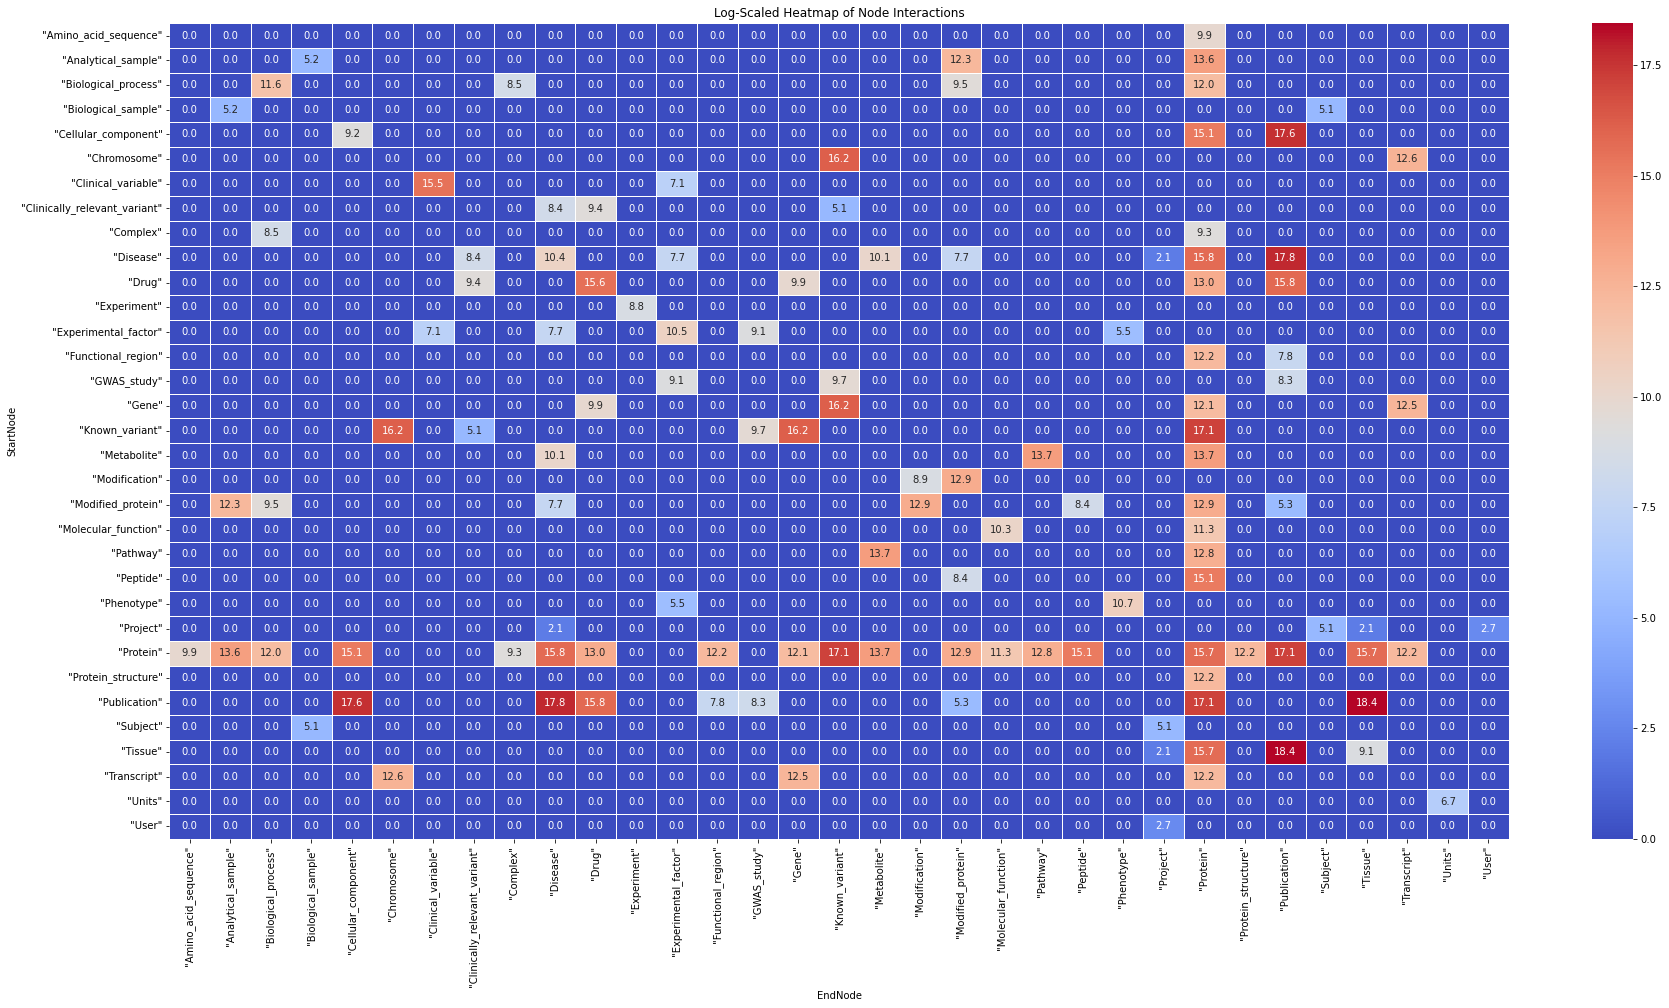

In [32]:
data[['StartNode', 'EndNode']] = data['NodePair'].str.split('-', expand=True)

# Create a pivot table to reformat the data for heatmap
pivot_table = data.pivot("StartNode", "EndNode", "Count")
pivot_table = pivot_table.fillna(0)  # Fill missing values with 0

# Printing the pivot table to verify the structure
# print(pivot_table)

pivot_table_log = np.log1p(pivot_table)  # log1p ensures log(0+1) for 0 values

plt.figure(figsize=(30, 15))
sns.heatmap(pivot_table_log, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5)
plt.title('Log-Scaled Heatmap of Node Interactions')
plt.show()

<Figure size 2880x1080 with 0 Axes>

<Figure size 6000x4000 with 0 Axes>

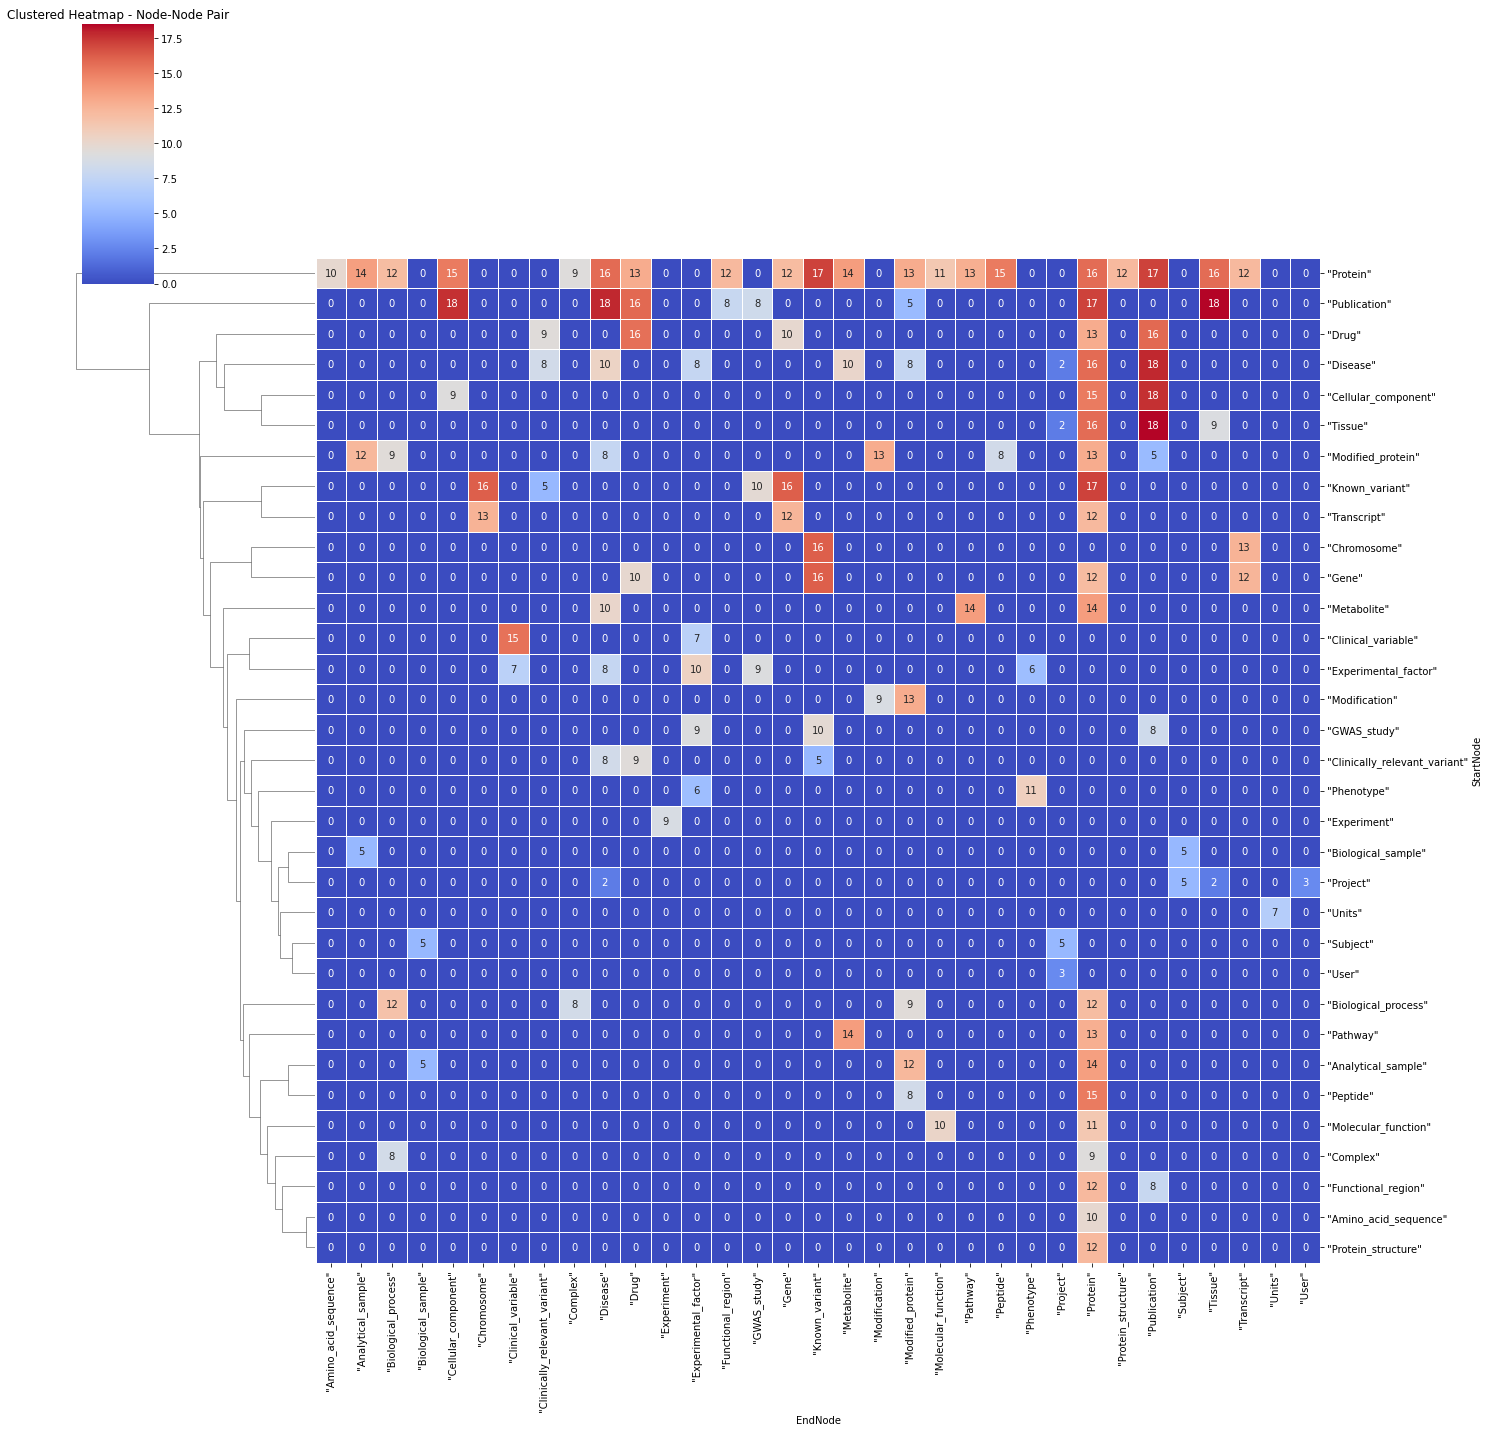

In [44]:
# Create a pivot table to reformat the data for the heatmap
pivot_table = data.pivot("StartNode", "EndNode", "Count").fillna(0)

# Log transformation of the pivot table
pivot_table_log = np.log1p(pivot_table)  # log1p ensures log(0+1) for 0 values

# Plot the clustered heatmap with adjusted parameters
plt.figure(figsize=(40, 15))
plt.figure(dpi=1000)
#plt.savefig('heatmap.pdf', dpi=300) 
sns.clustermap(pivot_table_log, annot=True, fmt=".0f", cmap="coolwarm", linewidths=.9, figsize=(20, 20),
               col_cluster=False, row_cluster=True)  # Disabling clustering for rows and columns
plt.title('Clustered Heatmap - Node-Node Pair')
plt.show()



<Figure size 6000x4000 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

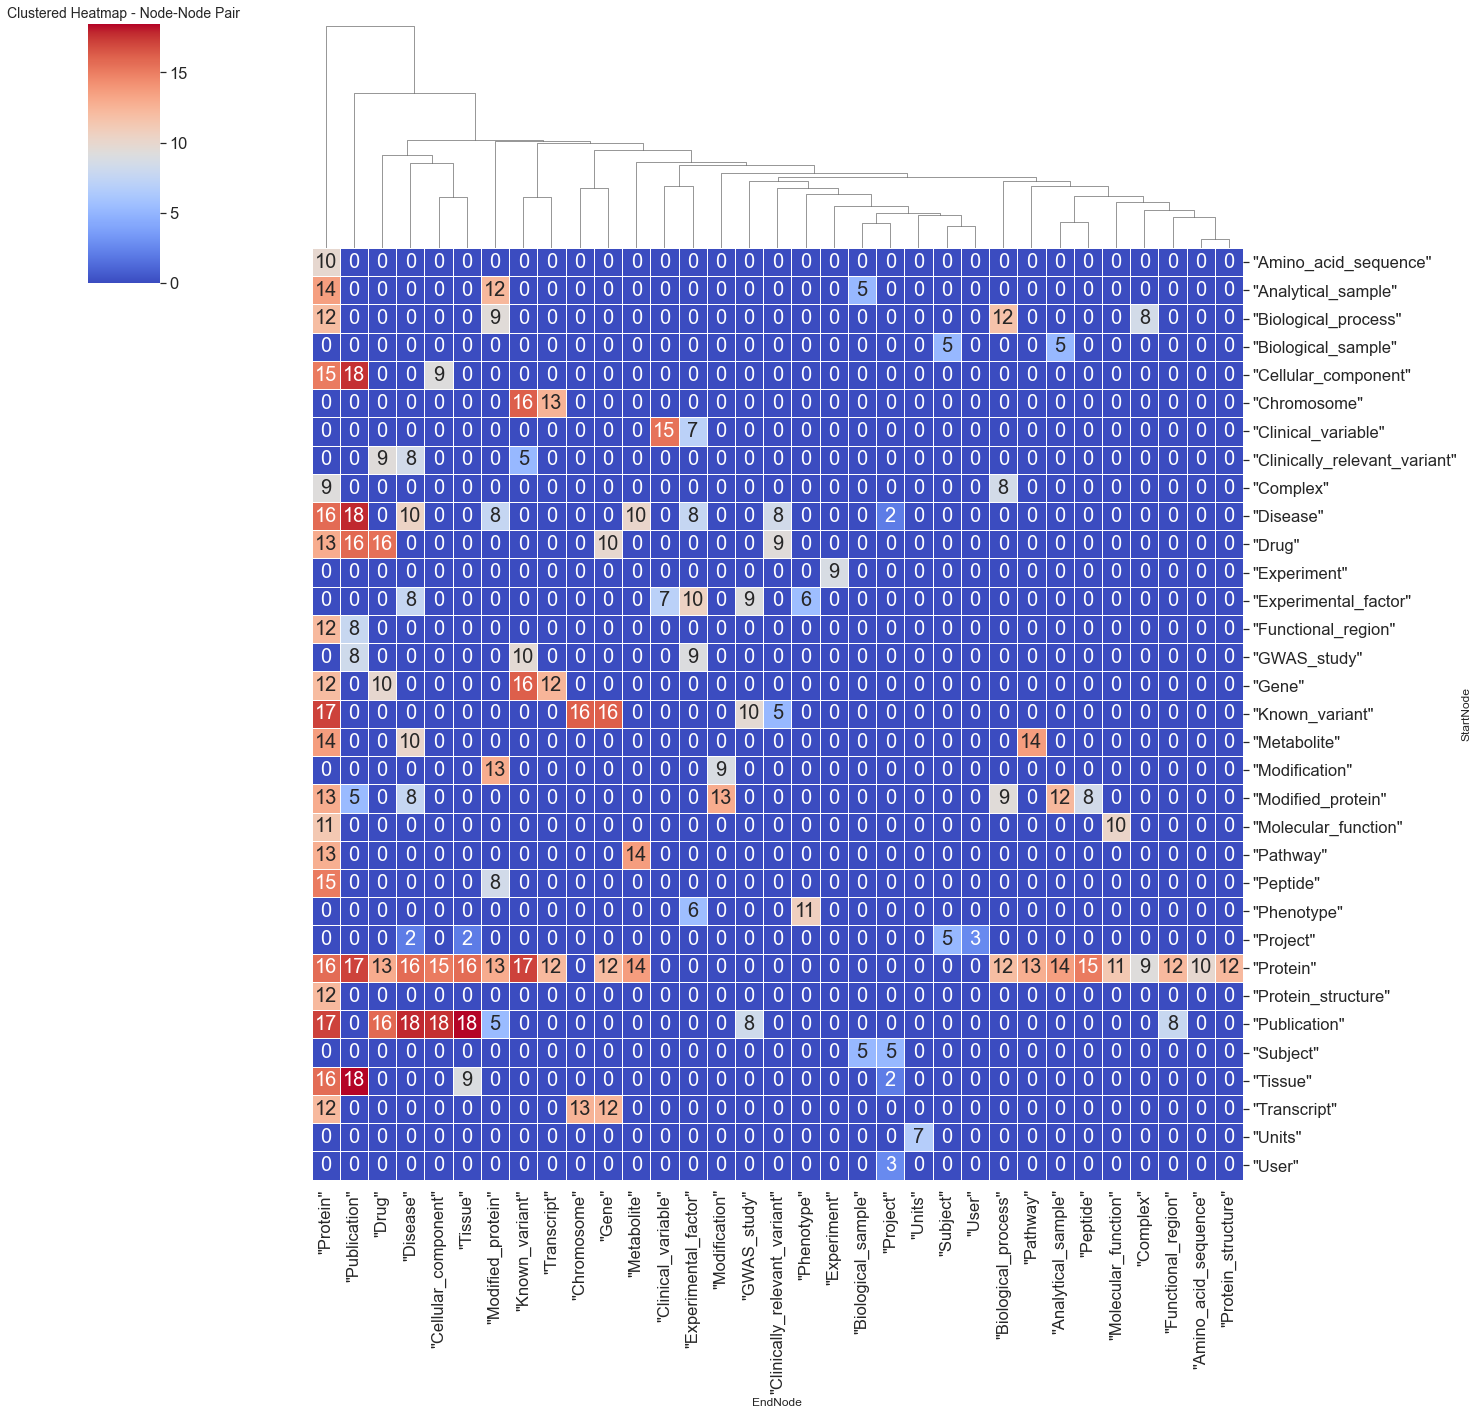

<Figure size 6000x4000 with 0 Axes>

In [47]:
sns.set(font_scale=1.5)  # Increase the base font size
plt.figure(figsize=(20, 20))

# Create a clustered heatmap
heatmap = sns.clustermap(pivot_table_log, annot=True, fmt=".0f", cmap="coolwarm", linewidths=.9,
                         figsize=(20, 20), col_cluster=True, row_cluster=False)

# Increase font size of the annotations within the heatmap
for text in heatmap.ax_heatmap.texts:
    text.set_size(20)  # Example size, you should adjust based on your actual needs

# Increase font size for the axes labels
heatmap.ax_heatmap.set_xlabel('EndNode', fontsize=12)
heatmap.ax_heatmap.set_ylabel('StartNode', fontsize=12)

# Increase font size for the title
plt.title('Clustered Heatmap - Node-Node Pair', fontsize=14)
plt.figure(dpi=1000)

In [34]:
pivot_table.head()

NodePair
"""Amino_acid_sequence""-""Protein"""
"""Analytical_sample""-""Biological_sample"""
"""Analytical_sample""-""Modified_protein"""
"""Analytical_sample""-""Protein"""
"""Biological_process""-""Biological_process"""


In [35]:
# Calculate basic statistics
mean_count = data['Count'].mean()
median_count = data['Count'].median()

print(f'Mean occurrence count: {mean_count}')
print(f'Median occurrence count: {median_count}')

Mean occurrence count: 3245969.5344827585
Median occurrence count: 20976.5


In [38]:
# Set the figure size for better readability
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [11]:

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

<Figure size 432x288 with 0 Axes>

In [74]:
# printing all counting
result_df.sort_values(by='Count', ascending=False)

,NodePair,Count
63,"""Publication""-""Tissue""",205739716
26,"""Disease""-""Publication""",111058056
11,"""Cellular_component""-""Publication""",87678754
42,"""Known_variant""-""Protein""",53636332
60,"""Protein""-""Publication""",53043908
...,...,...
18,"""Clinically_relevant_variant""-""Known_variant""",338
55,"""Project""-""Subject""",338
57,"""Project""-""User""",28
56,"""Project""-""Tissue""",14


In [14]:
data.count()

node         32
nodecount    32
dtype: int64

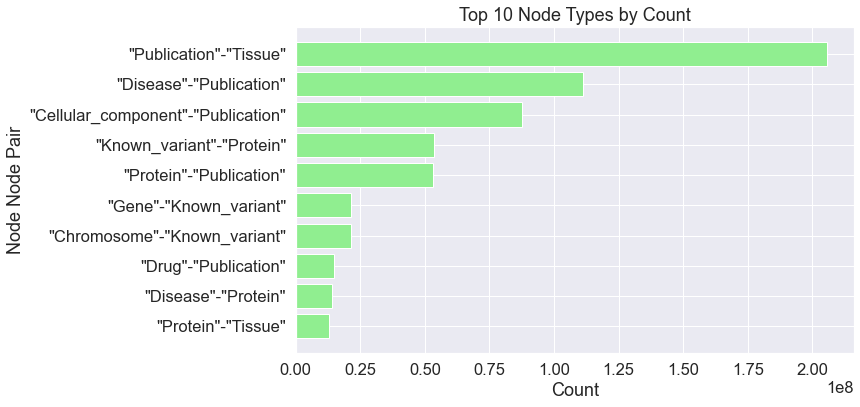

,NodePair,Count
63,"""Publication""-""Tissue""",205739716
26,"""Disease""-""Publication""",111058056
11,"""Cellular_component""-""Publication""",87678754
42,"""Known_variant""-""Protein""",53636332
60,"""Protein""-""Publication""",53043908
39,"""Gene""-""Known_variant""",21277870
12,"""Chromosome""-""Known_variant""",21260216
30,"""Drug""-""Publication""",14986148
25,"""Disease""-""Protein""",14164988
61,"""Protein""-""Tissue""",13058950


In [48]:
# display the top 10 and bottom 10 relationship types, we'll sort the dataframe by 'RelationshipCount' in descending order
# and then select the top 10 rows.

top_10_data = result_df.sort_values(by='Count', ascending=False).head(10)
bottom_10_data = result_df.sort_values(by='Count', ascending=True).head(10)



# Set the figure size for a clearer view
plt.figure(figsize=(10, 6))

# Bar Chart for Top 10 Relationship Types
plt.barh(top_10_data['NodePair'], top_10_data['Count'], color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Node Node Pair')
plt.title('Top 10 Node Types by Count')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

# Displaying the top 10 data in tabular format as well
top_10_data

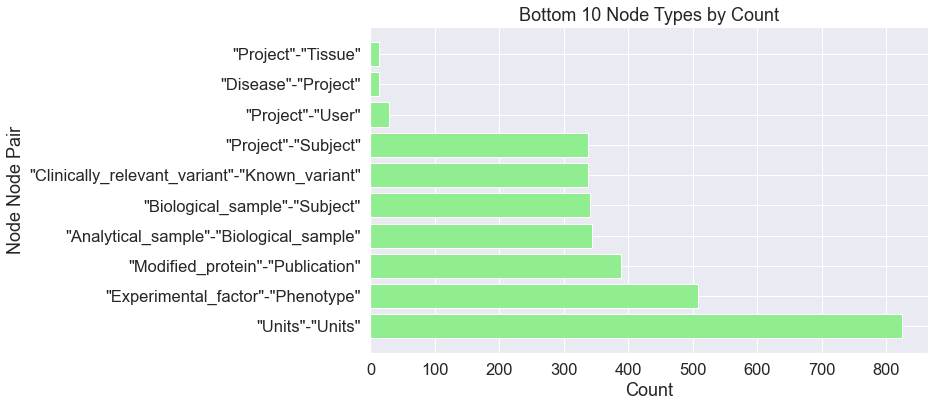

,NodePair,Count
56,"""Project""-""Tissue""",14
24,"""Disease""-""Project""",14
57,"""Project""-""User""",28
55,"""Project""-""Subject""",338
18,"""Clinically_relevant_variant""-""Known_variant""",338
8,"""Biological_sample""-""Subject""",340
1,"""Analytical_sample""-""Biological_sample""",344
49,"""Modified_protein""-""Publication""",388
34,"""Experimental_factor""-""Phenotype""",508
65,"""Units""-""Units""",824


In [49]:
# Set the figure size for a clearer view
plt.figure(figsize=(10, 6))

# Bar Chart for Top 10 Relationship Types
plt.barh(bottom_10_data['NodePair'], bottom_10_data['Count'], color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Node Node Pair')
plt.title('Bottom 10 Node Types by Count')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

# Displaying the top 10 data in tabular format as well
bottom_10_data

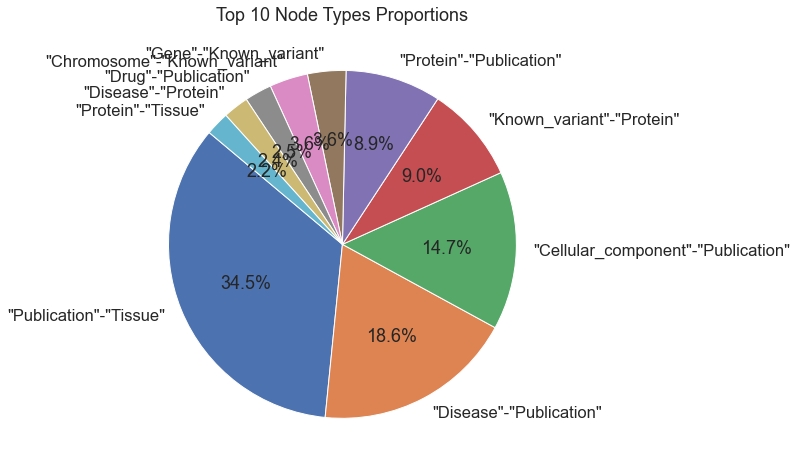

In [50]:
# Pie Chart for Top 10 Node Types
plt.figure(figsize=(8, 8))
plt.pie(top_10_data['Count'], labels=top_10_data['NodePair'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Node Types Proportions')
plt.show()


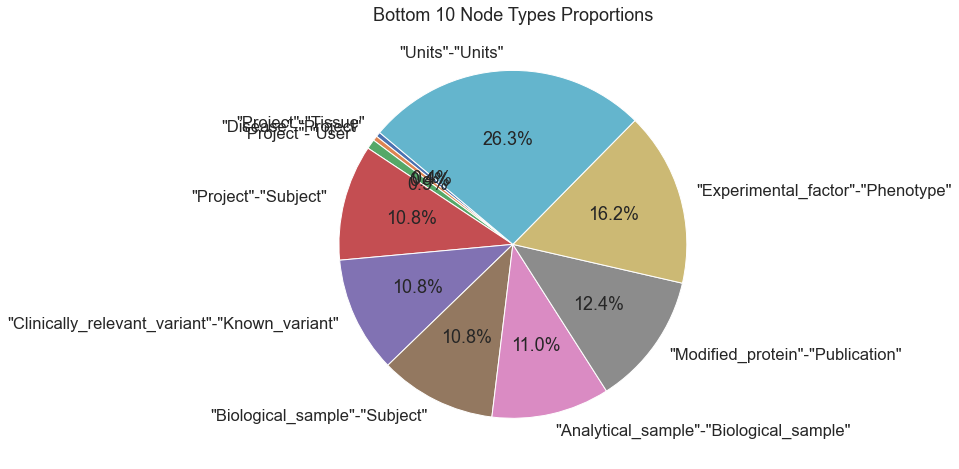

In [51]:
# Pie Chart for Bottom 10 Node Types
plt.figure(figsize=(8, 8))
plt.pie(bottom_10_data['Count'], labels=bottom_10_data['NodePair'], autopct='%1.1f%%', startangle=140)
plt.title('Bottom 10 Node Types Proportions')
plt.show()


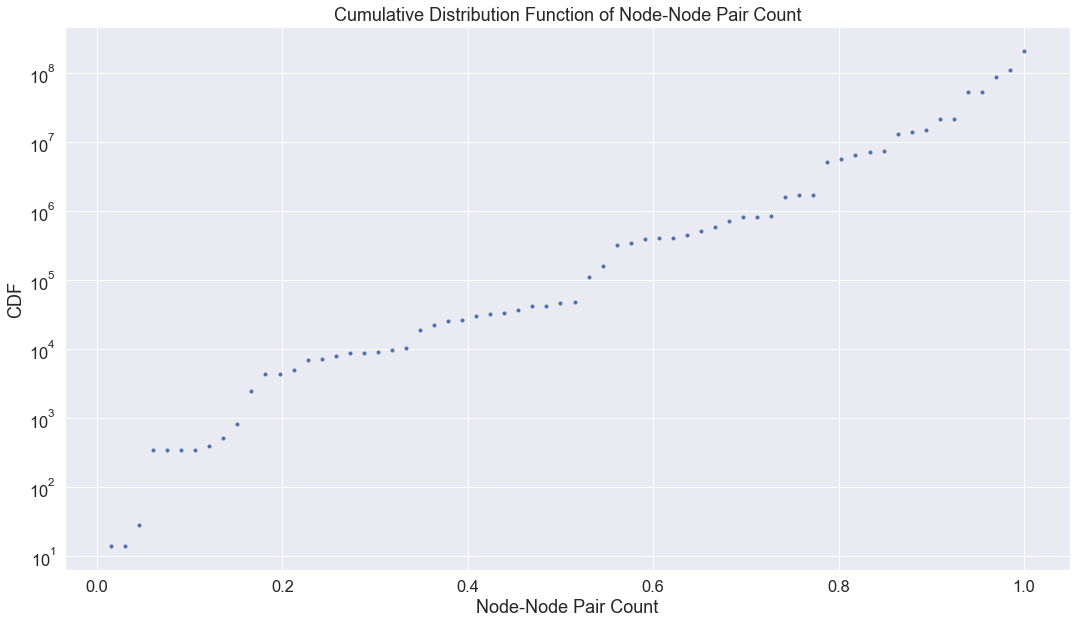

In [60]:
# Calculate the cumulative distribution function (CDF)
data_sorted = result_df['Count'].sort_values()
cdf = np.arange(1, len(data_sorted)+1) / len(data_sorted)

# Plot the CDF
plt.figure(figsize=(18, 10))
plt.plot(cdf,data_sorted,marker='.', linestyle='none')
plt.xlabel('Node-Node Pair Count')
plt.ylabel('CDF')
plt.yscale('log')
plt.title('Cumulative Distribution Function of Node-Node Pair Count')
plt.grid(True)

# Set the background color to white
fig = plt.gcf()  # Get the figure object
fig.set_facecolor('white')  # Set the color of the figure (background)





plt.show()


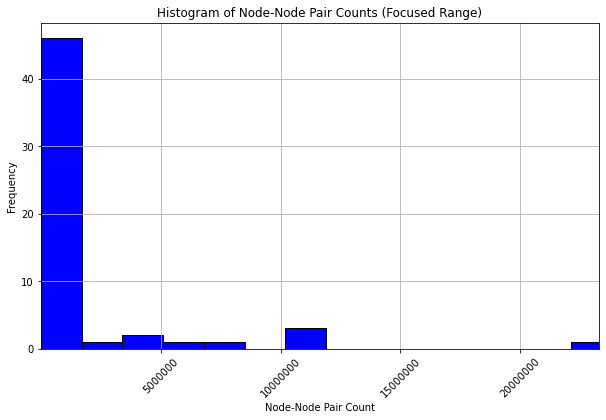

In [47]:
# To make the x-axis values more readable, especially for the top frequency graphs, 
# we'll adjust the histogram to focus on the range with the highest frequencies.
# We aim to make the x-axis values for the top 4 frequency graphs readable.

# Find the range that includes the top frequencies
# We'll use a smaller number of bins to focus on the most frequent counts and adjust the xlim to make the x-axis values readable

# First, let's determine an appropriate range for the x-axis by examining the data
max_count_for_top_frequencies = data['Count'].quantile(0.95)  # A rough estimate to focus on the most common counts

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data['Count'], bins=30, color='blue', edgecolor='black')

# Find the bins corresponding to the top 4 frequencies to adjust the x-axis range accordingly
top_bins = sorted(zip(n, bins[:-1]), reverse=True)[:4]  # Sort by frequency and take top 4
min_bin = min(top_bins, key=lambda x: x[1])[1]
max_bin = max_count_for_top_frequencies  # Use the 95th percentile as an upper limit for readability

plt.xlabel('Node-Node Pair Count')
plt.ylabel('Frequency')
plt.title('Histogram of Node-Node Pair Counts (Focused Range)')
plt.grid(True)

# Adjust the x-axis to focus on the most frequent counts, enhancing readability
plt.xlim(min_bin, max_bin)

# Change the x-axis to plain style to avoid exponent values and improve readability
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()
